# Nonsense O/E vs LOEUF
Explore the relationship between nonsense O/E values and LOEUF scores


In [242]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

from src import constants as C

In [243]:
_FILE_IN = "data/final/regional_nonsense_constraint.tsv"
OE_SVG = "data/plots/constraint/oe_vs_loeuf.svg"
OE_PNG = "data/plots/constraint/oe_vs_loeuf.png"
OE_CI_SVG = "data/plots/constraint/oe_ci_hi_vs_loeuf.svg"
OE_CI_PNG = "data/plots/constraint/oe_ci_hi_vs_loeuf.png"

In [244]:
plt.style.use(C.STYLE_DEFAULT)

In [245]:
def filter_transcripts(df):
    return df[df["region"] == "transcript"].copy()

In [246]:
def get_interest_cols(df, *args):
    interest = df[list(args)].copy().dropna()
    print(f"Transcripts with valid O/E and LOEUF scores: {len(interest)}")
    return interest

In [247]:
def ols_results(df):
    X = df.iloc[:,0]
    X = sm.add_constant(X)
    Y = df.iloc[:,1]

    model = sm.OLS(Y,X, missing="drop")
    results = model.fit()

    return results

In [248]:
def hexbin_plot(df, results, xlabel, ylabel="LOEUF"):
    fig, ax = plt.subplots(1, 1, figsize=(5 * C.CM, 5 * C.CM), layout="constrained")
    ax.hexbin(df.iloc[:, 0], df.iloc[:, 1], cmap="Blues")
    # ax.axline((0,0), slope=1, ls="--",c = "grey")
    ax.text(
        0.95,
        0.05,
        f"$r^2$ = {results.rsquared:.2f}",
        transform=ax.transAxes,
        ha="right",
        va="bottom",
    )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return fig, ax

In [249]:
def plot_regression_line(results, ax=None):
    if not ax:
        ax = plt.gca()
        
    ax.axline((0, results.params[0]), slope=results.params[1], c="k")

    return ax

## Read regional constraint data

In [250]:
df = pd.read_csv(_FILE_IN, sep="\t")

## O/E vs LOEUF

In [251]:
oe = filter_transcripts(df).pipe(get_interest_cols, "oe","loeuf")

Transcripts with valid O/E and LOEUF scores: 18105


In [252]:
results = ols_results(oe)
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  loeuf   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
No. Observations:               18105   F-statistic:                 2.573e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2729      0.005     54.290      0.000       0.263       0.283
oe             1.0506      0.007    160.420      0.000       1.038       1.063
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

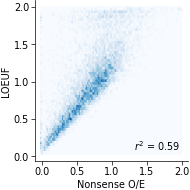

In [253]:
fig, ax = hexbin_plot(oe[oe["oe"] <= 2], results, "Nonsense O/E")

## Nonsense O/E CI upper vs LOEUF

In [254]:
ci = filter_transcripts(df).pipe(get_interest_cols, "oe_ci_hi","loeuf")

Transcripts with valid O/E and LOEUF scores: 18105


In [255]:
results = ols_results(ci)
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  loeuf   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
No. Observations:               18105   F-statistic:                 3.823e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1541      0.005     32.574      0.000       0.145       0.163
oe_ci_hi       0.8238      0.004    195.516      0.000       0.816       0.832
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

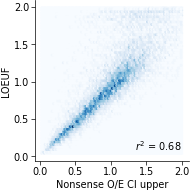

In [256]:
fig, ax = hexbin_plot(ci[ci["oe_ci_hi"] <= 2], results, "Nonsense O/E CI upper")